# PCA
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#https://etav.github.io/python/scikit_pca.html

In [181]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline

sb.set(font_scale=1.2,style="whitegrid") #set styling preferences

loan = pd.read_csv("creditcard.csv").sample(frac = .25) #read the dataset and sample 25% of it

#Data Wrangling
loan.replace([np.inf, -np.inf], np.nan) #convert infs to nans
loan = loan.dropna(axis = 1, how = 'any') #remove nans
loan = loan._get_numeric_data() #keep only numeric features

#Step 1: Standardize the Dataset
x = loan.drop('Class',axis=1).values #convert the data into a numpy array
x = scale(x);x

y = loan.Class 

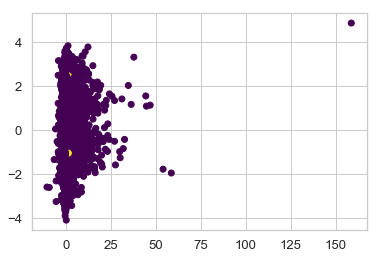

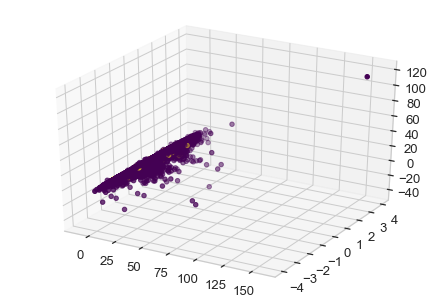

In [182]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)  
x_pca = pca.transform(x)

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='viridis')
plt.show()

pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x)

#https://stackoverflow.com/questions/1985856/how-to-make-a-3d-scatter-plot-in-python
#3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y,cmap='viridis')
plt.show()

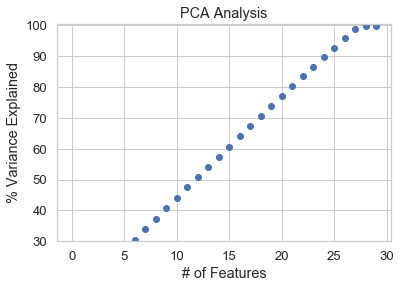

In [183]:
#Step 2: Create a Covariance Matrix
covar_matrix = PCA(n_components = 30) #we have 30 features

#Step 3: Calculate Eigenvalues
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

#Step 4, 5 & 6: Sort & Select

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var,'o')
plt.show()

In [184]:
variance

array([0.06715136, 0.05538814, 0.04063432, 0.03810915, 0.03541704,
       0.03460097, 0.03409635, 0.03406266, 0.03392678, 0.03379538,
       0.03362563, 0.03361686, 0.03343921, 0.03340539, 0.03328326,
       0.03322928, 0.0331463 , 0.03283895, 0.03278179, 0.03264494,
       0.03233479, 0.03220386, 0.03157975, 0.03138212, 0.03093556,
       0.03073358, 0.03038966, 0.02960504, 0.01049522, 0.00114666])

In [185]:
var

array([ 6.7, 12.2, 16.3, 20.1, 23.6, 27.1, 30.5, 33.9, 37.3, 40.7, 44.1,
       47.5, 50.8, 54.1, 57.4, 60.7, 64. , 67.3, 70.6, 73.9, 77.1, 80.3,
       83.5, 86.6, 89.7, 92.8, 95.8, 98.8, 99.8, 99.9])

In [186]:
covar_matrix = PCA(n_components = 25)
covar_matrix.fit(x)

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [187]:
covar_matrix.components_.shape

(25, 30)

In [188]:
covar_matrix.explained_variance_

array([2.01456919, 1.66166742, 1.21904673, 1.14329067, 1.06252604,
       1.03804381, 1.02290497, 1.02189418, 1.01781764, 1.01387576,
       1.00878316, 1.00852006, 1.0031905 , 1.00217579, 0.99851182,
       0.99689232, 0.99440307, 0.9851822 , 0.98346756, 0.97936182,
       0.97005729, 0.96612937, 0.94740568, 0.94147673, 0.92807997])

In [189]:
covar_matrix.explained_variance_ratio_

array([0.06715136, 0.05538814, 0.04063432, 0.03810915, 0.03541704,
       0.03460097, 0.03409635, 0.03406266, 0.03392678, 0.03379538,
       0.03362563, 0.03361686, 0.03343921, 0.03340539, 0.03328326,
       0.03322928, 0.0331463 , 0.03283895, 0.03278179, 0.03264494,
       0.03233479, 0.03220386, 0.03157975, 0.03138212, 0.03093556])

In [190]:
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print(var) #cumulative sum of variance explained with [n] features

[ 6.7 12.2 16.3 20.1 23.6 27.1 30.5 33.9 37.3 40.7 44.1 47.5 50.8 54.1
 57.4 60.7 64.  67.3 70.6 73.9 77.1 80.3 83.5 86.6 89.7]


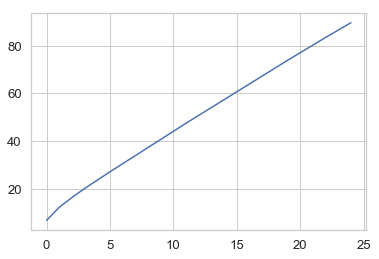

In [191]:
plt.plot([i for i in range(len(var))],var)
plt.show()

In [192]:
covar_matrix.singular_values_

array([378.73386565, 343.9656702 , 294.61389335, 285.31287932,
       275.05075239, 271.86348964, 269.87377941, 269.74040731,
       269.20184543, 268.68004743, 268.00442073, 267.96947018,
       267.2604851 , 267.12528645, 266.63653121, 266.42021382,
       266.08737892, 264.85082223, 264.62024464, 264.06730343,
       262.80991109, 262.27729082, 259.72337528, 258.90941336,
       257.06073638])

In [193]:
covar_matrix.mean_ 

array([ 8.42248910e-17,  7.98340199e-18, -1.86612022e-17, -3.17839192e-17,
        3.19336080e-18,  3.39294585e-18,  1.99585050e-19, -1.31726133e-17,
       -1.19751030e-18,  1.46695012e-17, -1.17755179e-17, -2.69439817e-17,
       -1.55676339e-17, -1.41705385e-17,  9.58008239e-18, -8.53226088e-18,
       -3.69232342e-18, -8.88153472e-18, -5.08941877e-18, -1.51684638e-17,
        5.18921129e-18,  3.39294585e-18, -1.31726133e-17, -3.99170100e-18,
        6.18713654e-18, -9.43039360e-18,  1.39709535e-18,  1.99585050e-19,
        0.00000000e+00, -1.23742731e-17])

In [194]:
covar_matrix.n_components_ 

25

In [195]:
covar_matrix.noise_variance_

0.6142295181329402

In [196]:
y.unique()

array([0, 1], dtype=int64)